In [1]:
"""
Bayes Theorem applied to estimating the probability of heads for 
observations of a coin toss.

Greg Hakim
University of Washington
16 April 2018
"""

'\nBayes Theorem applied to estimating the probability of heads for \nobservations of a coin toss.\n\nGreg Hakim\nUniversity of Washington\n16 April 2018\n'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

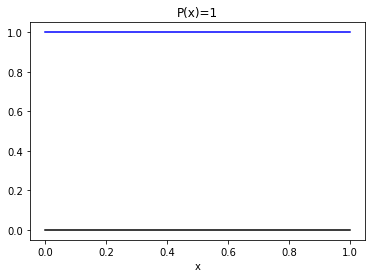

In [4]:
x = np.arange(0.,1.+dx,dx)
prior = np.ones(len(x))
plt.plot(x,prior,'b')
plt.plot([0,1],[0,0],'k')
plt.xlabel('x')
plt.title("P(x)=1")
plt.savefig('da_coin_1.png',dpi=300)

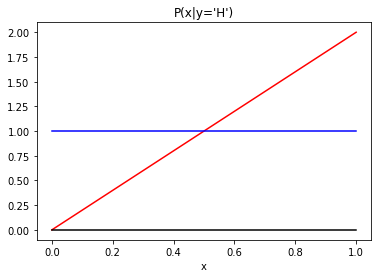

In [5]:
f1 = x*2.
plt.plot(x,f1,'r')
plt.plot(x,prior,'b')
plt.plot([0,1],[0,0],'k')
plt.xlabel('x')
plt.title("P(x|y='H')")
#np.sum(f1)*dx
plt.savefig('da_coin_2.png',dpi=300)

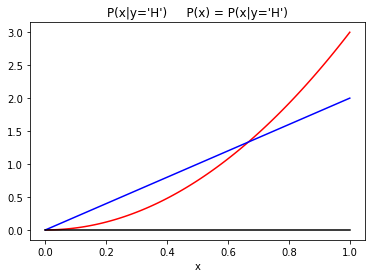

In [6]:
f2 = (x**2)*3.
plt.plot(x,f2,'r')
plt.plot(x,f1,'b')
plt.plot([0,1],[0,0],'k')
plt.xlabel('x')
plt.title("P(x|y='H')     P(x) = P(x|y='H')")
np.sum(f2)*dx
plt.savefig('da_coin_3.png',dpi=300)

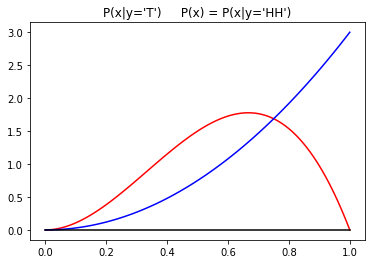

In [7]:
plt.plot(x,f,'r')
plt.plot(x,f2,'b')
plt.plot([0,1],[0,0],'k')
plt.title("P(x|y='T')     P(x) = P(x|y='HH')")
plt.savefig('da_coin_4.png',dpi=300)

Text(0.5,1,"P(x|y='HHT')")

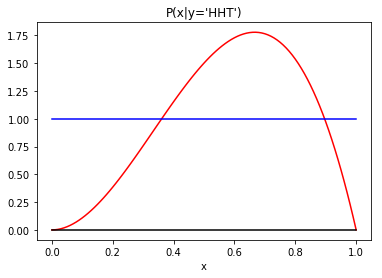

In [3]:
dx = 0.01
x = np.arange(0.,1.+dx,dx)
prior = np.ones(len(x))
f = (x**2 - x**3)*12.
plt.plot(x,f,'r')
plt.plot(x,prior,'b')
plt.plot([0,1],[0,0],'k')
plt.xlabel('x')
plt.title("P(x|y='HHT')")
#np.sum(f)*dx


1.0


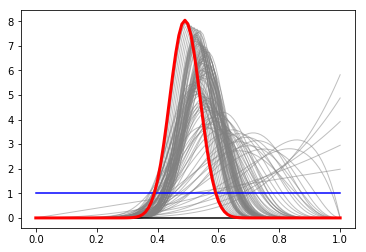

In [17]:
#obs = [1,1,0]
#obs = [1,1,0,1,0,0,0,1,1,1]
obs = np.random.randint(0,2,100)
prior = np.ones(len(x))
# save for plotting
oprior = prior
for ob in obs:
    if ob == 1:
        pxy = x*prior
    else:
        pxy = (1-x)*prior
    evidence = np.sum(pxy)*dx
    post = pxy/evidence
    plt.plot(x,post,'gray',linewidth=1,alpha=0.5)
    prior = post
    
plt.plot([0,1],[0,0],'k')
plt.plot(x,oprior,'b')
plt.plot(x,post,'r',linewidth=3)
print(np.sum(post)*dx)
plt.savefig('da_coin_5.png',dpi=300)

In [18]:
print(np.sum(obs==0))

51


1.0


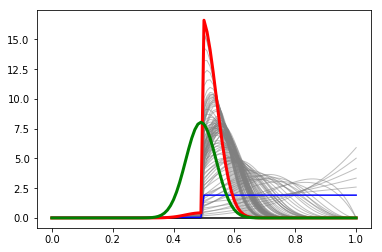

In [19]:
# save old posterior for comparison
opost = post
# bad prior
prior = np.zeros(len(x))
prior[50:] = 1
prior[0:50] = 0.025
prior = prior/(np.sum(prior)*dx)
# save for plotting
oprior = prior
print(np.sum(prior)*dx)
for ob in obs:
    if ob == 1:
        pxy = x*prior
    else:
        pxy = (1-x)*prior
    evidence = np.sum(pxy)*dx
    post = pxy/evidence
    plt.plot(x,post,'gray',linewidth=1,alpha=0.5)
    prior = post
    
plt.plot([0,1],[0,0],'k')
plt.plot(x,oprior,'b')
plt.plot(x,post,'r',linewidth=3)
plt.plot(x,opost,'g',linewidth=3)